<h1 style="font-size:5rem;color:green;">Basic Codes</h1>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx

# Open a file

In [2]:
EdgeList = open ("EdgeList1.txt", 'rb') # 'rb': read-binary
G = nx.read_edgelist(EdgeList, nodetype=int) # edges on each line of the input
EdgeList.close() # we can close the file now

# Draw an Undirected graph

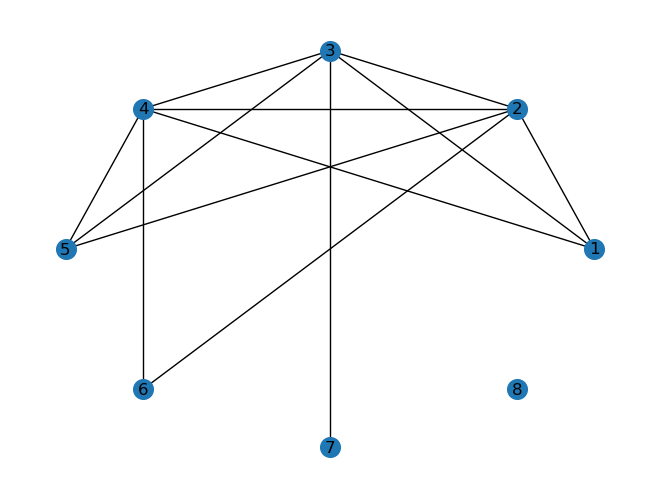

In [3]:
G.add_node('8') # Isolated node
nx.draw_circular(G, node_color='C0',node_size=200,with_labels=True)
plt.show()

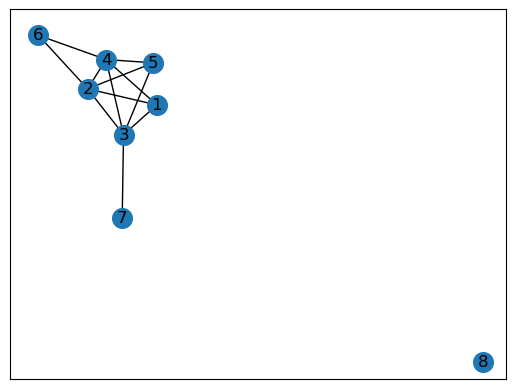

In [4]:
nx.draw_networkx(G,node_color='C0',node_size=200, with_labels=True)
plt.show()

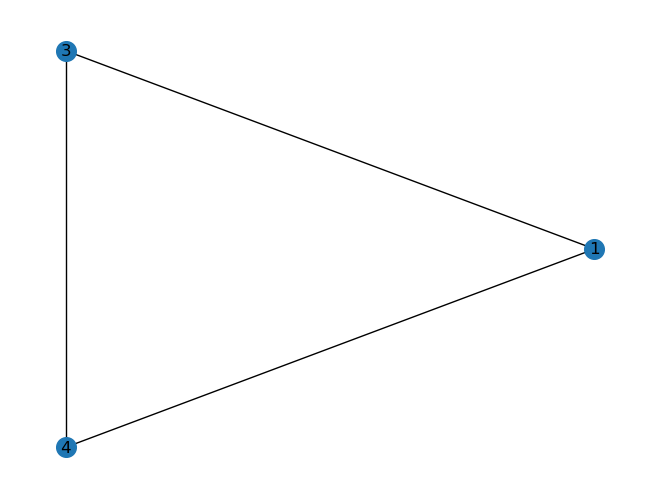

Subgraph edges: [(1, 3), (1, 4), (3, 4)]
Subgraph nodes: [1, 3, 4]


In [5]:
# Subgraph
H = G.subgraph([1,3,4])
subedges = list(H.edges())
H.nodes()
nx.draw_circular(H, node_color='C0',node_size=200,with_labels=True) # draw subgraph
plt.show()
print(f"Subgraph edges: {subedges}")
print(f"Subgraph nodes: {H.nodes}")

# Draw a Directed Graph

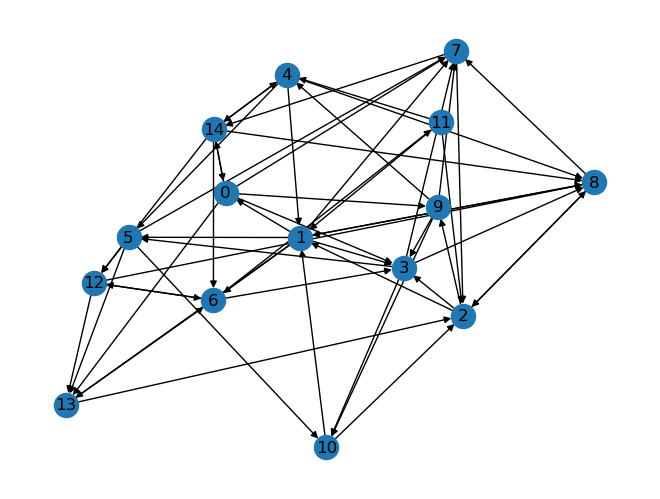

In [6]:
DG = nx.fast_gnp_random_graph(15,0.3,directed=True)
nx.draw(DG,with_labels=True)

# Degree of Nodes

In [7]:
print("In-degrees")
nodes = []
for n in DG.nodes():
    print(f'{n}: {DG.in_degree(n)}')

In-degrees
0: 2
1: 5
2: 5
3: 5
4: 3
5: 3
6: 4
7: 6
8: 6
9: 2
10: 3
11: 1
12: 3
13: 4
14: 3


In [8]:
print("Out-degrees")
nodes = []
for n in DG.nodes():
    print(f'{n}: {DG.out_degree(n)}')

Out-degrees
0: 5
1: 7
2: 4
3: 4
4: 4
5: 4
6: 3
7: 2
8: 3
9: 4
10: 2
11: 3
12: 3
13: 2
14: 5


In [9]:
sum(DG.out_degree(n) for n in DG.nodes()) == sum(DG.in_degree(n) for n in DG.nodes())
# the total sum of in-degree and the total sum of out-degree are the same.

True

In [10]:
G.degree ()

DegreeView({1: 3, 2: 5, 3: 5, 4: 5, 5: 3, 6: 2, 7: 1, '8': 0})

In [11]:
# This is a sequence generator. Note the square brackets the RHS of assignment statement.
degree_sequence = [d for n, d in G.degree()]
# d for n, d in G.degree(): contents in G.degree, indexed d, for n (1 to n)
print(f"Degree sequence {degree_sequence}") 

Degree sequence [3, 5, 5, 5, 3, 2, 1, 0]


In [12]:
degreeHist = {} # create a vector
for d in degree_sequence:
    if d in degreeHist:
        degreeHist[d]+= 1 #if there is a degree d increment the number of occurrances by one
    else:
        degreeHist[d] = 1

print ("degree #of_nodes")
for d in degreeHist:
    print(f"{d:4}  {degreeHist[d]:6}") # the :4 or :6 make a space size 4 or 6

degree #of_nodes
   3       2
   5       3
   2       1
   1       1
   0       1


# Subfigure

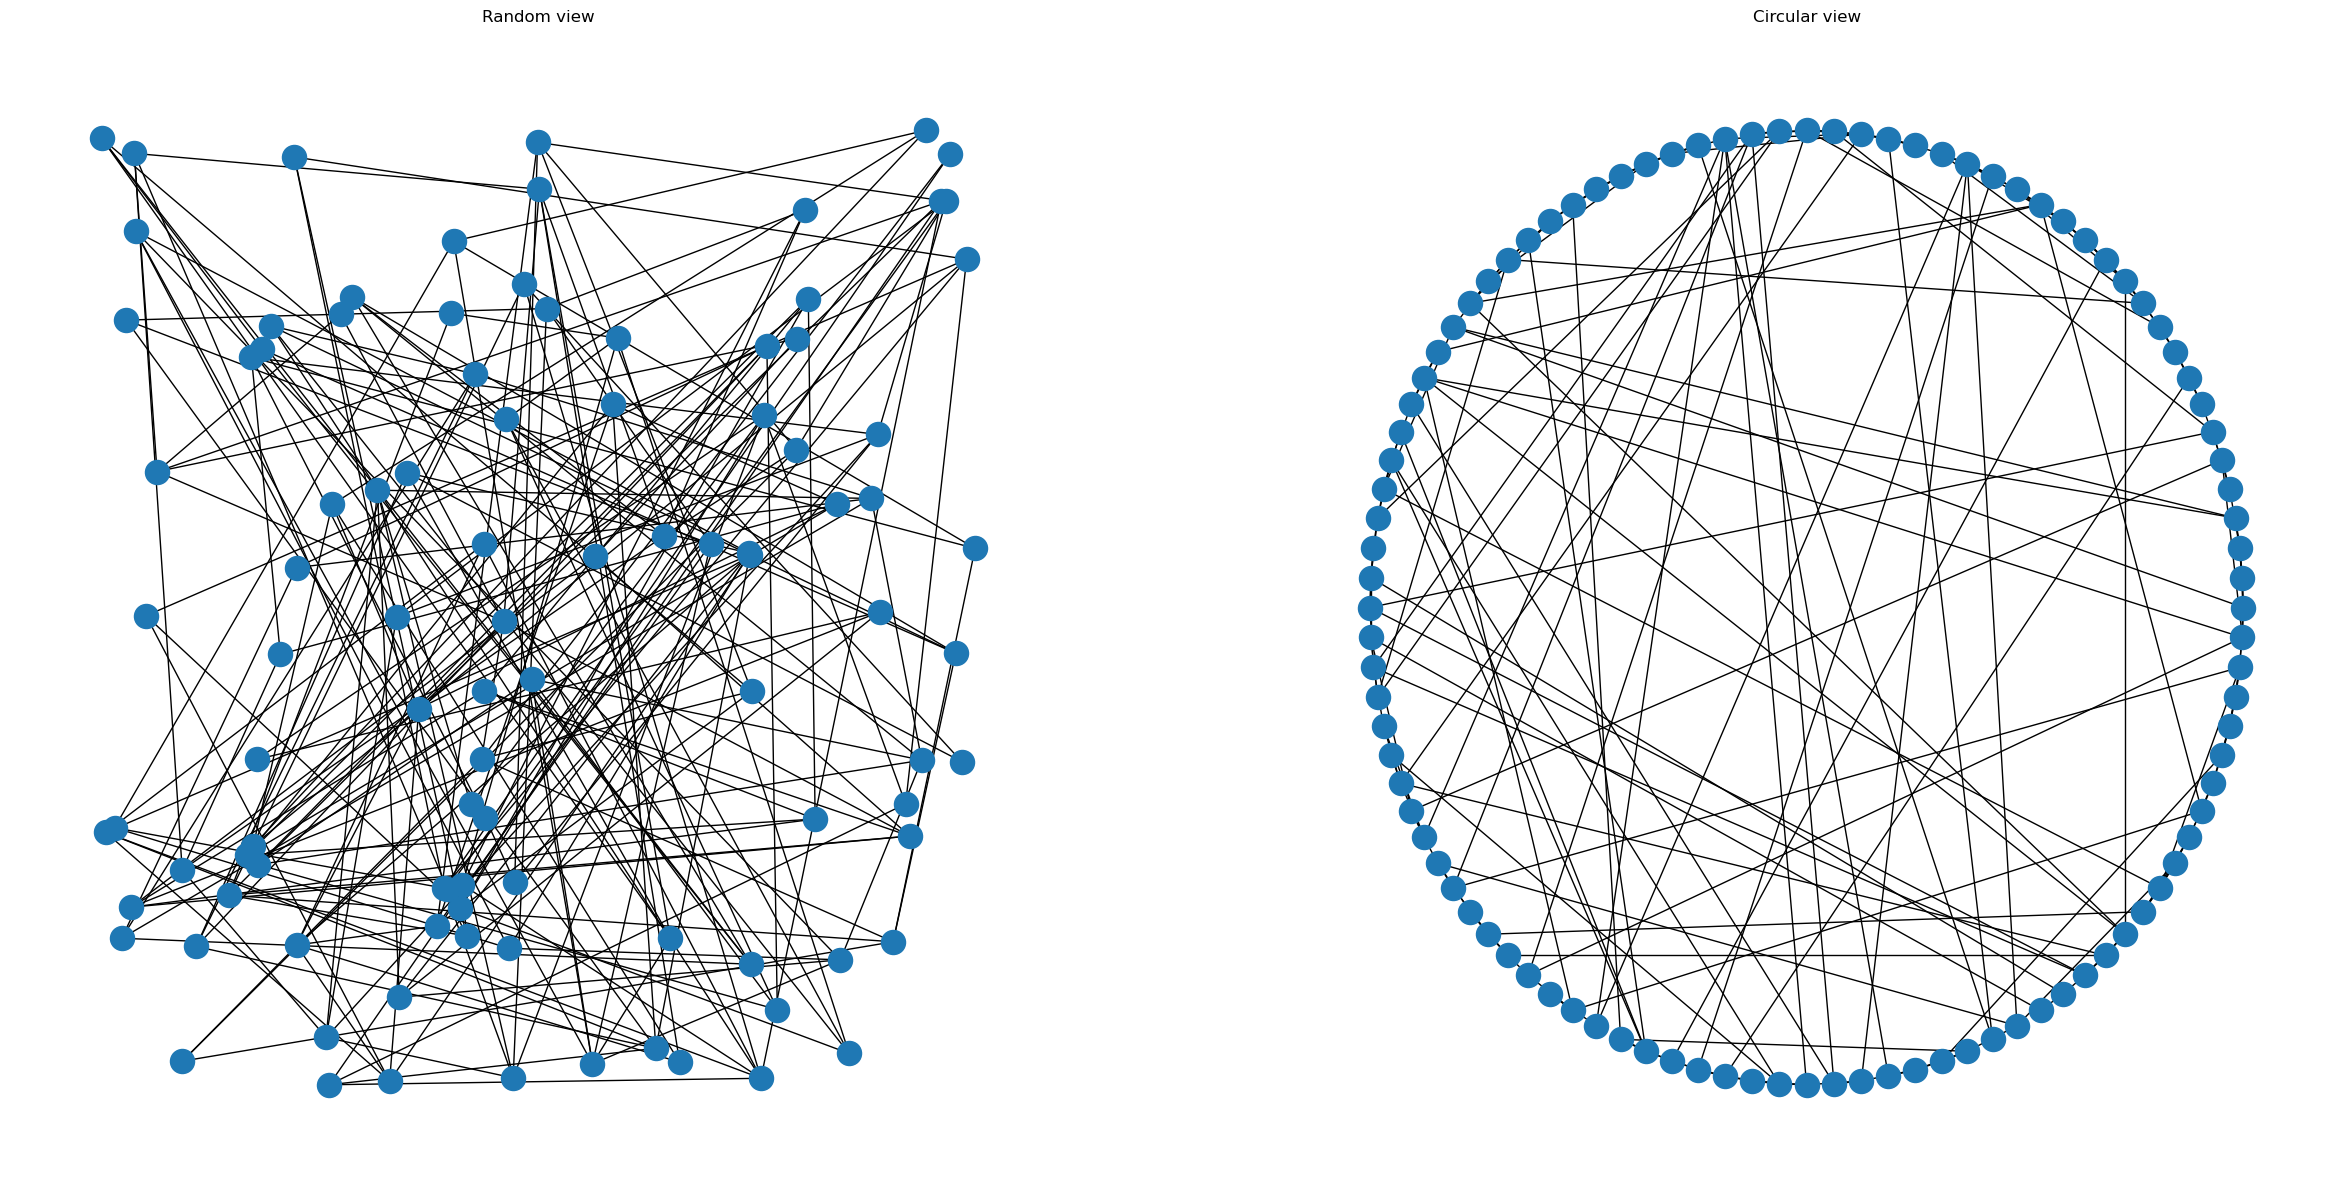

In [13]:
G_small_world = nx.watts_strogatz_graph(n=100, k=5, p=0.4)
graphs = [G_small_world, G_small_world]
names = ['Random view', 'Circular view']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,15))
ax = axes.flatten()
nx.draw_random(graphs[0],ax=ax[0])
ax[0].set_axis_off()
ax[0].set_title(names[0])
nx.draw_circular(graphs[1], ax=ax[1])
ax[1].set_axis_off()
ax[1].set_title(names[1])
plt.show()